In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

In [ ]:
cust = pd.read_csv('/content/drive/MyDrive/KLTN/BÀI LUẬN/clean_train.csv')
cust.head()

,customer_number,client_sex,Age,staff_vib,sms,Verify_method,IB_REGISTER_DATE,Tenure,EB_register_channel,No.Activity_Name,...,max_TermDeposite_Balance,min_TermDeposite_Balance,No_Loan,Avg_Loan_Balance,max_Loan_Balance,min_Loan_Balance,No_CC,No_DC,max_datediff,churn
0,398189,M,23,N,Y,SMART_OTP,11/9/2019,1.73,BRANCH,10,...,0.000000e+00,0.0,0,0,0,0,0,1,6.0,0
1,580494,F,42,N,Y,SMS,3/18/2019,9.60,BRANCH,10,...,0.000000e+00,0.0,0,0,0,0,0,1,30.0,0
2,658868,M,25,N,Y,SMART_OTP,8/13/2019,4.67,BRANCH,13,...,0.000000e+00,0.0,0,0,0,0,0,1,3.0,0
3,253047,F,22,N,N,SMS,2/12/2019,10.73,BRANCH,10,...,1.270000e+09,0.0,0,0,0,0,0,0,16.0,0
4,171374,M,33,N,Y,SMART_OTP,4/17/2019,8.60,BRANCH,14,...,0.000000e+00,0.0,0,0,0,0,0,2,32.0,1


In [ ]:
cust.rename(columns={'customer_number': 'Customer_number', 'client_sex' : 'Client_gender', 'staff_vib': 'Staff_VIB','sms':'SMS', 'No.Activity_Name': 'No_Activity_Name', 'Type_Trans_LV2' : 'Type_Transaction', 'Avg_trans_no/month': 'Avg_trans_no_month' }, inplace = True)

In [ ]:
cust.head(5)

,Customer_number,Client_gender,Age,Staff_VIB,SMS,Verify_method,IB_REGISTER_DATE,Tenure,EB_register_channel,No_Activity_Name,...,max_TermDeposite_Balance,min_TermDeposite_Balance,No_Loan,Avg_Loan_Balance,max_Loan_Balance,min_Loan_Balance,No_CC,No_DC,max_datediff,churn
0,398189,M,23,N,Y,SMART_OTP,11/9/2019,1.73,BRANCH,10,...,0.000000e+00,0.0,0,0,0,0,0,1,6.0,0
1,580494,F,42,N,Y,SMS,3/18/2019,9.60,BRANCH,10,...,0.000000e+00,0.0,0,0,0,0,0,1,30.0,0
2,658868,M,25,N,Y,SMART_OTP,8/13/2019,4.67,BRANCH,13,...,0.000000e+00,0.0,0,0,0,0,0,1,3.0,0
3,253047,F,22,N,N,SMS,2/12/2019,10.73,BRANCH,10,...,1.270000e+09,0.0,0,0,0,0,0,0,16.0,0
4,171374,M,33,N,Y,SMART_OTP,4/17/2019,8.60,BRANCH,14,...,0.000000e+00,0.0,0,0,0,0,0,2,32.0,1


In [ ]:
training_data = cust.drop(['Customer_number', 'IB_REGISTER_DATE', 'max_datediff'], axis = 1)

**Encode Cats**

In [ ]:
target_col = ["churn"]
cat_cols   = training_data.nunique()[training_data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in training_data.columns if x not in cat_cols + target_col]

In [ ]:
cat_cols

['Client_gender', 'Staff_VIB', 'SMS', 'Verify_method', 'EB_register_channel']

In [ ]:
training_data.isnull().sum()

Client_gender                 0
Age                           0
Staff_VIB                     0
SMS                           0
Verify_method                 0
Tenure                        0
EB_register_channel           0
No_Activity_Name              0
Type_Transaction              0
Total_trans_no                0
Avg_trans_no_month            0
Avg_Trans_Amount              0
Max_trans_amount              0
Min_trans_amount              0
No_CurrentAccount             0
Avg_CurrentAccount_Balance    0
max_CurrentAccount_Balance    0
Min_CurrentAccount_Balance    0
No_TermDeposite               0
Avg_TermDeposite_Balance      0
max_TermDeposite_Balance      0
min_TermDeposite_Balance      0
No_Loan                       0
Avg_Loan_Balance              0
max_Loan_Balance              0
min_Loan_Balance              0
No_CC                         0
No_DC                         0
churn                         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
encode_col =  cat_cols

In [ ]:
encode_col

['Client_gender', 'Staff_VIB', 'SMS', 'Verify_method', 'EB_register_channel']

In [ ]:
training_data[encode_col]

,Client_gender,Staff_VIB,SMS,Verify_method,EB_register_channel
0,M,N,Y,SMART_OTP,BRANCH
1,F,N,Y,SMS,BRANCH
2,M,N,Y,SMART_OTP,BRANCH
3,F,N,N,SMS,BRANCH
4,M,N,Y,SMART_OTP,BRANCH
...,...,...,...,...,...
66758,M,N,N,SMART_OTP,AUTO-JOB
66759,F,N,Y,SMART_OTP,BRANCH
66760,M,N,Y,SMART_OTP,MYVIB
66761,M,N,Y,SMART_OTP,BRANCH


In [ ]:
for col in encode_col:
  training_data[col] = le.fit_transform(training_data[col])
  training_data[col] = le.fit_transform(training_data[col])

training_data

,Client_gender,Age,Staff_VIB,SMS,Verify_method,Tenure,EB_register_channel,No_Activity_Name,Type_Transaction,Total_trans_no,...,Avg_TermDeposite_Balance,max_TermDeposite_Balance,min_TermDeposite_Balance,No_Loan,Avg_Loan_Balance,max_Loan_Balance,min_Loan_Balance,No_CC,No_DC,churn
0,1,23,0,1,1,1.73,1,10,3,38,...,0.0,0.000000e+00,0.0,0,0,0,0,0,1,0
1,0,42,0,1,2,9.60,1,10,4,52,...,0.0,0.000000e+00,0.0,0,0,0,0,0,1,0
2,1,25,0,1,1,4.67,1,13,1,2,...,0.0,0.000000e+00,0.0,0,0,0,0,0,1,0
3,0,22,0,0,2,10.73,1,10,1,2,...,346355068.0,1.270000e+09,0.0,0,0,0,0,0,0,0
4,1,33,0,1,1,8.60,1,14,4,95,...,0.0,0.000000e+00,0.0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66758,1,29,0,0,1,4.23,0,14,2,7,...,0.0,0.000000e+00,0.0,2,402356579,959866947,27699500,1,0,0
66759,0,21,0,1,1,5.87,1,6,1,1,...,0.0,0.000000e+00,0.0,0,0,0,0,0,1,1
66760,1,19,0,1,1,7.10,2,17,3,79,...,0.0,0.000000e+00,0.0,0,0,0,0,0,1,1
66761,1,24,0,1,1,9.27,1,12,1,6,...,0.0,0.000000e+00,0.0,0,0,0,0,0,1,1


**Split DATA**

In [ ]:
X = training_data.drop('churn', axis=1)
y = training_data.churn

In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
# Scoring function
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV   #Perforing grid search


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [ ]:
y_train.value_counts()

0    30095
1    16639
Name: churn, dtype: int64

In [ ]:
y_test.value_counts()

0    12908
1     7121
Name: churn, dtype: int64

In [ ]:
y.value_counts()

0    43003
1    23760
Name: churn, dtype: int64

In [ ]:
# Initialization of the KNN
knMod = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2,
                             metric = 'minkowski', metric_params = None)
# Fitting the model with training data
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Initialization of the GradientBoosting model
gbMod = GradientBoostingClassifier(loss = 'deviance', n_estimators = 200)
# Fitting the model with training data
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [ ]:
# Initialization of the GradientBoosting model
gbMod_1 = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
# Fitting the model with training data
gbMod_1.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           random_state=10, subsample=0.8)

In [ ]:
# Initialization of the Random Forest model
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini')
# Fitting the model with training data
rfMod.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Initialization of the XGBoost model
XGMod = XGBClassifier(learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
# Fitting the model with training data
XGMod.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=0.1, max_depth=4, min_child_weight=6,
              n_estimators=177, nthread=4, seed=27, subsample=0.8)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


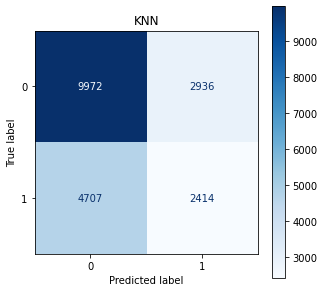

In [ ]:

# Compute the model accuracy on the given test data and labels
knn_acc = knMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = knMod.predict_proba(np.array(X_test.values))[:,1]
y_true = y_test #np.array(y_test.values)
y_pred = knMod.predict(X_test) #knMod.predict(np.array(X_test.values))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
KNN_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro', sample_weight = None)
knn_recall = recall_score(y_true, y_pred )
knn_precision = precision_score(y_true, y_pred )
knn_f1_score = f1_score(y_true, y_pred )

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(knMod, X_test ,y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('KNN')
plt.show()



In [ ]:
knMod.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
df = pd.DataFrame(knMod.predict(X_test), columns = ['Predict'])
#pd.DataFrame(y_test)

df.to_excel('Predict_KNN.xlsx', index = False)

# Mục mới

array([0, 1, 0, ..., 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


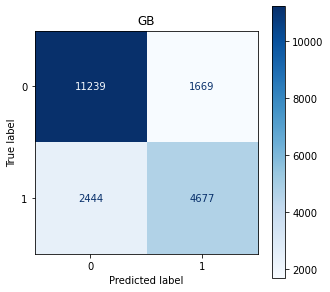

In [ ]:

# Compute the model accuracy on the given test data and labels
gb_acc = gbMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod.predict_proba(np.array(X_test.values))[:,1]
y_true = y_test
y_pred =  gbMod.predict(np.array(X_test.values))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
GB_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
gb_recall = recall_score(y_true, y_pred )
gb_precision = precision_score(y_true, y_pred )
gb_f1_score = f1_score(y_true, y_pred )


from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(gbMod, X_test , y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('GB')
plt.show()

df = pd.DataFrame(y_pred, columns = ['Predict'])
#pd.DataFrame(y_test)

df.to_excel('Predict_GB.xlsx', index = False)

df_2 = pd.DataFrame(y_true, columns = ['True'])
#pd.DataFrame(y_test)

df_2.to_excel('True_GB.xlsx', index = False)


In [ ]:

# Compute the model accuracy on the given test data and labels
gb_acc_1 = xb.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = xb.predict_proba(np.array(X_test.values))[:,1]
y_true = y_test
y_pred =  xb.predict(np.array(X_test.values))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
GB_roc_auc_1 = roc_auc_score(y_test, test_labels , average = 'macro')
gb_recall_1 = recall_score(y_true, y_pred )
gb_precision_1 = precision_score(y_true, y_pred )
gb_f1_score_1 = f1_score(y_true, y_pred )


from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(gbMod_1, X_test , y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('GB_1')
plt.show()



XGBoostError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


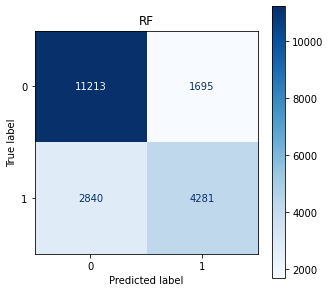

In [ ]:
# Compute the model accuracy on the given test data and labels
rf_acc = rfMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = rfMod.predict_proba(np.array(X_test.values))[:,1]
y_true = y_test
y_pred =  rfMod.predict(np.array(X_test.values))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
RF_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
rf_recall = recall_score(y_true, y_pred )
rf_precision = precision_score(y_true, y_pred )
rf_f1_score = f1_score(y_true, y_pred )

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(rfMod, X_test , y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('RF')
plt.show()

In [ ]:
y_true

3363     0
26388    1
16734    0
14000    0
5800     1
        ..
1206     1
33005    1
12151    1
47757    0
5890     0
Name: churn, Length: 20029, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


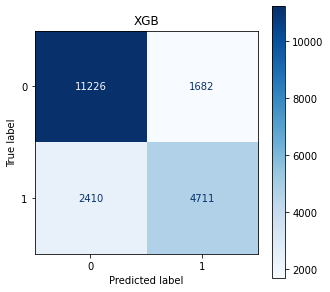

In [ ]:
# Compute the model accuracy on the given test data and labels
XG_acc = XGMod.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = XGMod.predict_proba(X_test)[:,1]
y_true = y_test
y_pred = XGMod.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
XG_roc_auc = roc_auc_score(y_test, test_labels)
XG_recall = recall_score(y_true, y_pred )
XG_precision = precision_score(y_true, y_pred )
XG_f1_score = f1_score(y_true, y_pred )

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(XGMod, X_test , y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('XGB')
plt.show()

In [ ]:
models = ['GradientBoosting', 'XGBoost' ]
accuracy = [gb_acc_1, XG_acc ]
roc_auc = [ GB_roc_auc_1, XG_roc_auc ]
f1_score = [ gb_f1_score_1, XG_f1_score]
recall = [ gb_recall_1, XG_recall ]
precision = [ gb_precision_1, XG_precision]
d = {'Accuracy': accuracy, 'Roc_Auc': roc_auc, 'F1_Score':f1_score, 'Recall':recall, 'Precision':precision}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,Accuracy,Roc_Auc,F1_Score,Recall,Precision
GradientBoosting,0.796196,0.862114,0.695691,0.655245,0.741459
XGBoost,0.795696,0.862107,0.697203,0.661564,0.736900


In [ ]:
S# fpr_knn, tpr_knn, _ = roc_curve(y_test, knMod.predict_proba(np.array(X_test.values))[:,1])
# fpr_rf, tpr_rf, _ = roc_curve(y_test, rfMod.predict_proba(np.array(X_test.values))[:,1])
# fpr_gb, tpr_gb, _ = roc_curve(y_test, gbMod.predict_proba(np.array(X_test.values))[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, XGMod.predict_proba(X_test)[:,1])

array([0.        , 0.01030369, 0.06329408, 0.22745584, 0.50588782,
       0.80880074, 1.        ])

In [ ]:
from scikit-learn import metrics

SyntaxError: ignored

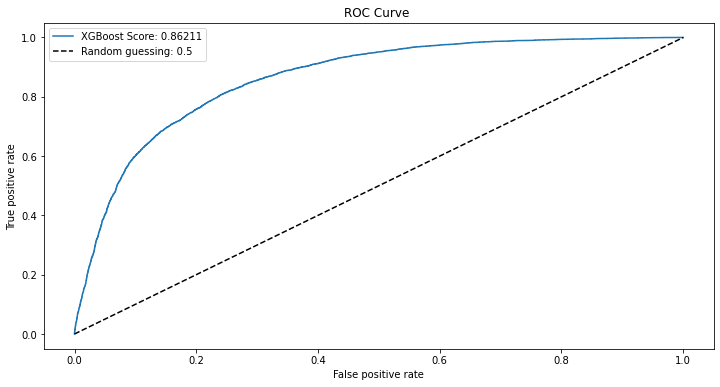

In [ ]:
# Plot the roc curve
plt.figure(figsize = (12,6), linewidth= 1)
# plt.plot(fpr_knn, tpr_knn, label = 'KNN Score: ' + str(round(KNN_roc_auc, 5)))
# plt.plot(fpr_rf, tpr_rf, label = 'RF score: ' + str(round(RF_roc_auc, 5)))
# plt.plot(fpr_gb, tpr_gb, label = 'GB Score: ' + str(round(GB_roc_auc, 5)))
plt.plot(fpr_xgb, tpr_xgb, label = 'XGBoost Score: ' + str(round(XG_roc_auc, 5)))


plt.plot([0,1], [0,1], 'k--', label = 'Random guessing: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.show()

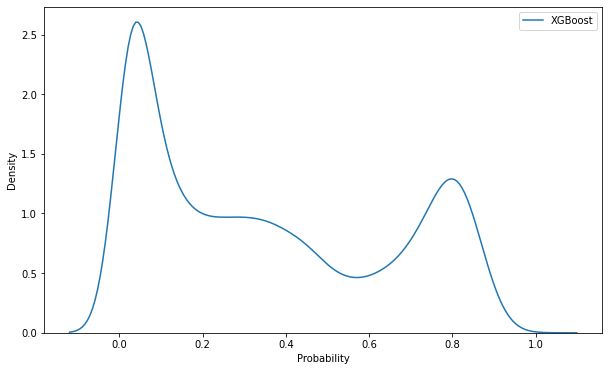

In [ ]:
plt.figure(figsize=(10,6))
# sns.kdeplot( knMod.predict_proba(np.array(X_test.values))[:,1], label='KNN')
# sns.kdeplot(rfMod.predict_proba(np.array(X_test.values))[:,1], label='Random Forest')
# sns.kdeplot(gbMod.predict_proba(np.array(X_test.values))[:,1], label='Gradient Boosting')
sns.kdeplot(XGMod.predict_proba(X_test)[:,1], label = 'XGBoost')
#plt.title("Biểu đồ mật độ xác suất cho 4 mô hình phân loại")
plt.legend()
plt.ylabel('Density')
plt.xlabel('Probability')
plt.show()

**Feature importances**

In [ ]:
#xgb.plot_importance(clf, max_num_features=10, height=1.2);
#XGMod.feature_importances_

# plot feature importance
from xgboost import plot_importance
plot_importance(gbMod)
plt.show()
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
from xgboost import plot_importance


ValueError: ignored

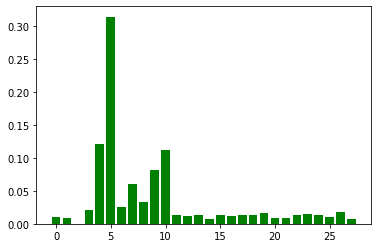

In [ ]:
plt.bar(range(X.shape[1]),XGMod.feature_importances_, color = "green", align = "center")
plt.show()

In [ ]:
knMod.predict_proba(np.array(X_test.values))[:,1]

NameError: ignored

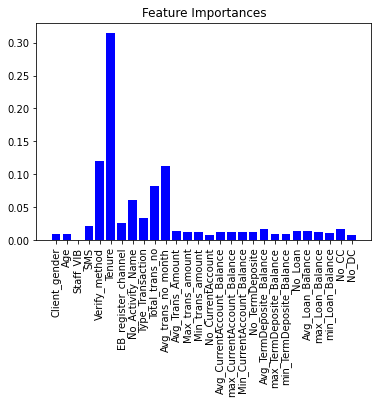

In [ ]:


from xgboost import plot_importance
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),XGMod.feature_importances_,  color = "blue", align = "center")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

In [ ]:
training_data_v2 =training_data.drop(['verify_method', 'min_termdeposite_balance', 'max_termdeposite_balance', 'no_loan', 'avg_loan_balance', 'max_loan_balance', 'no_cc'], axis =1)

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'max_depth': 3,
    'nthread': 8,
    'num_leaves': 8,
    'eval_metric': ['logloss', 'auc'],
    'learning_rate': 0.001
}
eval_results = {}
clf = xgb.train(params, train_set, num_boost_round=4000, evals=[(train_set, 'train'), (test_set, 'eval')],
                evals_result=eval_results, verbose_eval=False)

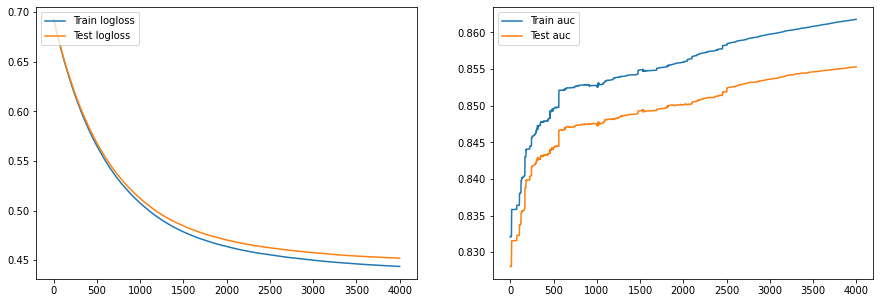

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(eval_results['train']['logloss'], label='Train logloss')
ax[0].plot(eval_results['eval']['logloss'], label='Test logloss')
ax[0].legend(loc='upper left')

ax[1].plot(eval_results['train']['auc'], label='Train auc')
ax[1].plot(eval_results['eval']['auc'], label='Test auc')
ax[1].legend(loc='upper left')
plt.show()

**Basic Statistic**

In [ ]:
df = X_train.describe()
df.to_excel("/content/drive/MyDrive/KLTN/Describe_1.xlsx")

In [ ]:
X_test.describe()

,client_sex,age,staff_vib,sms,tenure,eb_register_channel,no.activity_name,type_trans_lv2,total_trans_no,avg_trans_no/month,avg_trans_amount,max_trans_amount,min_trans_amount,no_currentaccount,avg_currentaccount_balance,max_currentaccount_balance,min_currentaccount_balance,no_termdeposite,avg_termdeposite_balance,min_loan_balance,no_dc
count,20029.000000,20029.000000,20029.000000,20029.000000,20029.000000,20029.000000,20029.000000,20029.000000,20029.000000,20029.000000,2.002900e+04,2.002900e+04,2.002900e+04,20029.000000,2.002900e+04,2.002900e+04,2.002900e+04,20029.000000,2.002900e+04,2.002900e+04,20029.000000
mean,0.586799,29.820011,0.023216,0.659644,5.349004,1.029707,10.321933,1.715013,24.302262,4.318838,7.652753e+06,2.882369e+07,2.400586e+06,1.016177,7.801410e+06,2.179213e+07,1.311626e+06,0.315992,4.160508e+07,1.319525e+08,0.805282
std,0.492421,8.050607,0.150594,0.473841,2.977977,0.350563,3.169975,1.463682,72.692019,11.593323,3.440231e+07,9.297291e+07,2.525917e+07,0.191015,4.710034e+07,2.461732e+08,8.409725e+06,1.091415,3.178148e+08,4.141967e+08,0.658349
min,0.000000,18.000000,0.000000,0.000000,1.030000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,24.000000,0.000000,0.000000,2.730000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,3.483540e+05,6.940700e+05,4.593300e+04,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,1.000000,28.000000,0.000000,1.000000,4.830000,1.000000,10.000000,2.000000,6.000000,1.000000,8.280560e+05,3.300000e+06,2.000000e+04,1.000000,1.182972e+06,2.569828e+06,1.206130e+05,0.000000,0.000000e+00,0.000000e+00,1.000000
75%,1.000000,34.000000,0.000000,1.000000,7.630000,1.000000,12.000000,3.000000,24.000000,5.000000,3.493459e+06,1.500260e+07,1.000000e+05,1.000000,4.070040e+06,9.471696e+06,4.834810e+05,0.000000,0.000000e+00,2.869896e+06,1.000000
max,1.000000,59.000000,1.000000,1.000000,12.100000,2.000000,24.000000,8.000000,4962.000000,712.000000,1.000000e+09,1.000000e+09,1.000000e+09,8.000000,3.857067e+09,2.603122e+10,4.946125e+08,34.000000,1.996132e+10,1.194361e+10,11.000000


In [ ]:
for i in training_data.columns:
  sns.distplot(training_data[training_data['churn'] == 0][ i] ,  hist = False, kde = True, rug = True,
              color = 'deeppink',
              kde_kws={'linewidth': 3},
              rug_kws={'color': 'deeppink'},
                label = 'non-churner')

  sns.distplot(training_data[training_data['churn'] == 1][i] ,  hist = False, kde = True, rug = True,
              color = 'blue',
              kde_kws={'linewidth': 3},
              rug_kws={'color': 'blue'},
                label = 'churner')
  plt.show()

**Cabliration curve**

In [ ]:
numeric_features = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'DAYS_BIRTH','FLAG_PHONE','FLAG_EMAIL', 'DAYS_CREDIT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','CREDIT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
GradientBoosting = GradientBoostingClassifier(n_estimators=250,
                                              max_depth=3,
                                              min_samples_split=150,
                                              min_samples_leaf=80,
                                                  max_features=0.8
)

clf_gb1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(GradientBoosting, cv = 5, method = 'isotonic'
                                                            ))])

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='TARGET'),data[('TARGET')] , test_size=0.2,
                                                    random_state=0)

clf_gb1.fit(X_train, y_train)
auc_gb1 = roc_auc_score(y_test, clf_gb1.predict_proba(X_test)[:, 1]) * 100
print(f"AUC score:{auc_gb1}")

y_predict_gb1 = clf_gb1.predict_proba(X_test)[:, 1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_predict_gb1)

print(classification_report(y_test, clf_gb1.predict(X_test)))

plot_confusion_matrix(clf_gb1, X_test, y_test,
                                 cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')

y_predicted = clf_gb1.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
plt.show()

IndentationError: ignored

AUC score:86.18562443158494
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     12908
           1       0.74      0.65      0.69      7121

    accuracy                           0.80     20029
   macro avg       0.78      0.76      0.77     20029
weighted avg       0.79      0.80      0.79     20029



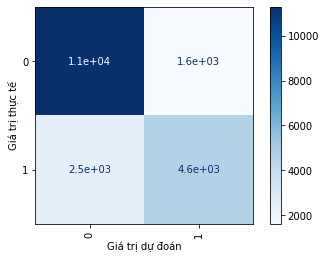

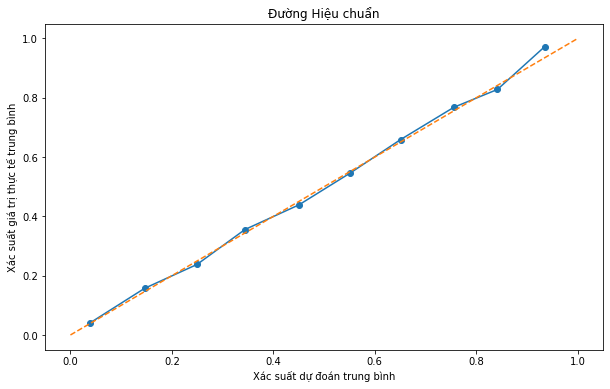

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV, calibration_curve



numeric_features = num_cols
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

categorical_features =cat_cols
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
GradientBoosting = GradientBoostingClassifier(n_estimators=250,
                                              max_depth=3,
                                              min_samples_split=150,
                                              min_samples_leaf=80,
                                                  max_features=0.8
)

clf_gb1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('calibrated', CalibratedClassifierCV(GradientBoosting, cv = 5, method = 'isotonic'
                                                            ))])

clf_gb1.fit(X_train, y_train)
auc_gb1 = roc_auc_score(y_test, clf_gb1.predict_proba(X_test)[:, 1]) * 100
print(f"AUC score:{auc_gb1}")

y_predict_gb1 = clf_gb1.predict_proba(X_test)[:, 1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_predict_gb1)

print(classification_report(y_test, clf_gb1.predict(X_test)))

plot_confusion_matrix(clf_gb1, X_test, y_test,
                                 cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.grid(False)
plt.ylabel('Giá trị thực tế')
plt.xlabel('Giá trị dự đoán')

y_predicted = XGMod.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
plt.show()

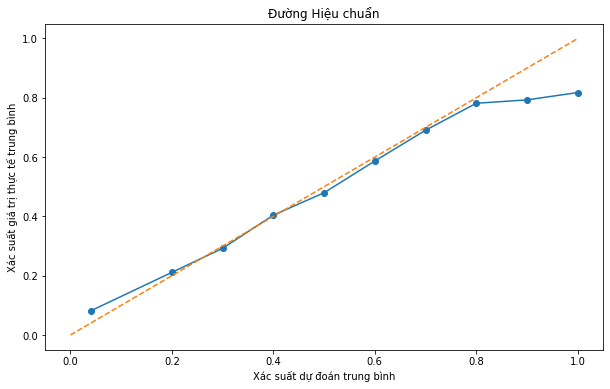

In [ ]:
y_predicted = rfMod.predict_proba(X_test)[:, 1]
prob_true, prob_predicted = calibration_curve(y_true=y_test, y_prob=y_predicted, n_bins=10, normalize=True)
plt.figure(figsize=(10, 6))
plt.plot(prob_predicted, prob_true, '-o')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('Xác suất dự đoán trung bình')
plt.ylabel('Xác suất giá trị thực tế trung bình')
plt.title('Đường Hiệu chuẩn')
plt.show()

**Decision tree - Extract rule**

In [ ]:
training_data.head()

,client_sex,age,staff_vib,sms,verify_method,tenure,eb_register_channel,no.activity_name,type_trans_lv2,total_trans_no,avg_trans_no/month,avg_trans_amount,max_trans_amount,min_trans_amount,no_currentaccount,avg_currentaccount_balance,max_currentaccount_balance,min_currentaccount_balance,no_termdeposite,avg_termdeposite_balance,max_termdeposite_balance,min_termdeposite_balance,no_loan,avg_loan_balance,max_loan_balance,min_loan_balance,no_cc,no_dc,churn
0,1,23,0,1,1,1.73,1,10,3,38,22,956500,17833000,2000,1,8302778,10689640,5915917,0,0.0,0.000000e+00,0.0,0,0,0,0,0,1,0
1,0,42,0,1,2,9.60,1,10,4,52,5,1059833,5000000,10000,1,460311,727781,215126,0,0.0,0.000000e+00,0.0,0,0,0,0,0,1,0
2,1,25,0,1,1,4.67,1,13,1,2,0,850000,1600000,100000,1,136479,208633,91581,0,0.0,0.000000e+00,0.0,0,0,0,0,0,1,0
3,0,22,0,0,2,10.73,1,10,1,2,0,1225000,2300000,150000,1,484063,1854536,75857,3,346355068.0,1.270000e+09,0.0,0,0,0,0,0,0,0
4,1,33,0,1,1,8.60,1,14,4,95,11,48167680,257000000,50000,2,64904641,186657240,65267,0,0.0,0.000000e+00,0.0,0,0,0,0,0,2,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=1234)
model = clf.fit(X_train, y_train)

In [ ]:
# Compute the model accuracy on the given test data and labels
DT_acc = clf.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = clf.predict_proba(np.array(X_test.values))[:,1]
y_true = y_test
y_pred =  clf.predict(np.array(X_test.values))
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
DT_roc_auc = roc_auc_score(y_test, test_labels , average = 'macro')
DT_recall = recall_score(y_true, y_pred )
DT_precision = precision_score(y_true, y_pred )
#DT_f1_score = f1_score(y_true, y_pred )

DT_acc

0.7919516700783863

In [ ]:
# get the text representation
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
X.head(5)

,client_sex,age,staff_vib,sms,verify_method,tenure,eb_register_channel,no.activity_name,type_trans_lv2,total_trans_no,avg_trans_no/month,avg_trans_amount,max_trans_amount,min_trans_amount,no_currentaccount,avg_currentaccount_balance,max_currentaccount_balance,min_currentaccount_balance,no_termdeposite,avg_termdeposite_balance,max_termdeposite_balance,min_termdeposite_balance,no_loan,avg_loan_balance,max_loan_balance,min_loan_balance,no_cc,no_dc
0,1,23,0,1,1,1.73,1,10,3,38,22,956500,17833000,2000,1,8302778,10689640,5915917,0,0.0,0.000000e+00,0.0,0,0,0,0,0,1
1,0,42,0,1,2,9.60,1,10,4,52,5,1059833,5000000,10000,1,460311,727781,215126,0,0.0,0.000000e+00,0.0,0,0,0,0,0,1
2,1,25,0,1,1,4.67,1,13,1,2,0,850000,1600000,100000,1,136479,208633,91581,0,0.0,0.000000e+00,0.0,0,0,0,0,0,1
3,0,22,0,0,2,10.73,1,10,1,2,0,1225000,2300000,150000,1,484063,1854536,75857,3,346355068.0,1.270000e+09,0.0,0,0,0,0,0,0
4,1,33,0,1,1,8.60,1,14,4,95,11,48167680,257000000,50000,2,64904641,186657240,65267,0,0.0,0.000000e+00,0.0,0,0,0,0,0,2


In [ ]:
text_representation = tree.export_text(clf, feature_names=X_test.columns.to_list())
print(text_representation)


In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    print("def predict({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [ ]:
fig = plt.figure(figsize=(40, 30))
_ = tree.plot_tree(clf,
                   feature_names=X_test.columns.to_list(),
                   class_names=clf.classes_.astype(int).astype(str),
                   filled=True, )
fig.savefig('DT.png')


In [ ]:
def predict(tenure,avg_trans_no_month, no_activity_name,total_trans_no):
  if tenure <= 6.415:
    if avg_trans_no_month <= 1.5:
      if tenure <= 3.215:
        return [[9289,1503]]
      else:
          return [[7664, 4495]]
    else:
        if tenure <= 3.45:
        return [[10241, 373]]
      else:
        return [[8261, 1130]]
  else:
    if avg_trans_no_month <=11.5:
      if no_activity_name <= 7.5:
        return [[1532, 1646]]
      else:
        return [[4459, 13508]]
    else:
     if total_trans_no <= 190.5:
      return [[946, 857]]
     else:
      return [[611, 248]]

In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [ ]:
rules = get_rules(clf, X.columns.to_list() , clf_.classes_.astype(int).astype(str) )
for r in rules:
    print(r)

In [ ]:
eval_set = [(X_test, y_test)]
XGMod.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

In [ ]:
eval_set = [(X_test, y_test)]
gbMod.fit(X_train, y_train, eval_metric="logloss", eval_set=eval_set, verbose=True)

TypeError: ignored

In [ ]:
XGMod_1 = XGBClassifier(colsample_bytree=0.8, gamma=0.1, max_depth=4, min_child_weight=6,
              n_estimators=177, nthread=4, seed=27, subsample=0.8)
XGMod_1.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=0.1, max_depth=4, min_child_weight=6,
              n_estimators=177, nthread=4, seed=27, subsample=0.8)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


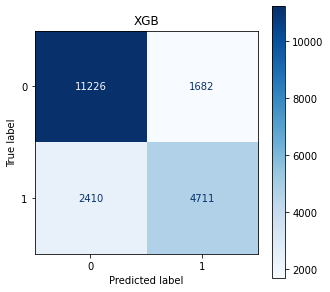

In [ ]:
XG_acc = XGMod_1.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = XGMod_1.predict_proba(X_test)[:,1]
y_true = y_test
y_pred = XGMod_1.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
XG_roc_auc = roc_auc_score(y_test, test_labels)
XG_recall = recall_score(y_true, y_pred )
XG_precision = precision_score(y_true, y_pred )
XG_f1_score = f1_score(y_true, y_pred )

from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(XGMod_1, X_test , y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('XGB')
plt.show()

In [ ]:
XG_acc

0.7956962404513456

In [ ]:
XG_roc_auc

0.8621065547342763

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(probs_lgr, label='Logistic regression')
sns.kdeplot(preds_svc, label='SVM')
plt.title("Probability Density Plot for 2 Classifiers")
plt.show()

In [ ]:
XGMod

**TUNNING**

In [ ]:
#Choose all predictors except target & IDcols
#predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(50,500, 10)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(colsample_bytree=0.8, gamma=0.1, max_depth=4, min_child_weight=6, nthread=4, seed=27, subsample=0.8),
param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
grid = {'learning_rate':[0.01,0.05,0.1, 0.1],'n_estimators':[100, 150, 200 , 250],'max_depth':[ 4,5,6,7] }

xb = XGBClassifier(colsample_bytree=0.8, gamma=0.1, min_child_weight=6, nthread=4, seed=27, subsample=0.8)
gb_cv = GridSearchCV(xb, grid, cv = 4)
gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100}
Train Score: 0.7989686846347817
Test Score: 0.7961955165010735


In [ ]:
grid = {'max_depth':[5,6,7,8,9,10,11] }#, 'min_samples_split':range(100,1001,100) , 'min_samples_leaf':range(30,61,5)}

gb = GradientBoostingClassifier(learning_rate=0.1,n_estimators=162)

gb_cv = GridSearchCV(gb, grid, cv = 4)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)S
print("Train Score:",gb_cv.best_score_)
print("Test Score:",gb_cv.score(X_test,y_test))

Best Parameters: {'max_depth': 5}
Train Score: 0.7971712926840068
Test Score: 0.7949473263767537


In [ ]:
# Initialization of the GradientBoosting model
gbMod_1 = XGBClassifier(learning_rate=0.05,colsample_bytree=0.8, gamma=0.1,max_depth = 7 , min_child_weight=6,n_estimators = 100 , nthread=4, seed=27, subsample=0.8)
# Fitting the model with training data
gbMod_1.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7,
              min_child_weight=6, nthread=4, seed=27, subsample=0.8)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


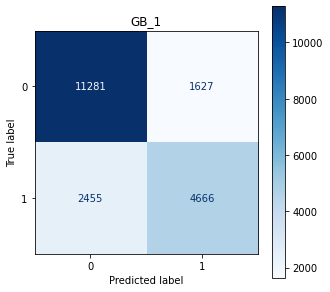

In [ ]:

# Compute the model accuracy on the given test data and labels
gb_acc_1 = gbMod_1.score(X_test, y_test)
# Return probability estimates for the test data
test_labels = gbMod_1.predict_proba(X_test)[:,1]
y_true = y_test
y_pred =  gbMod_1.predict(X_test)
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
GB_roc_auc_1 = roc_auc_score(y_test, test_labels , average = 'macro')
gb_recall_1 = recall_score(y_true, y_pred )
gb_precision_1 = precision_score(y_true, y_pred )
gb_f1_score_1 = f1_score(y_true, y_pred )


from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots( figsize=(5,5))
plot_confusion_matrix(gbMod_1, X_test , y_test, cmap=plt.cm.Blues, values_format = '.0f',  ax= ax  )
plt.title('GB_1')
plt.show()



In [ ]:

gb_acc_1


0.795846023266264